In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [64]:
monthly = pd.read_csv("monthly_features.csv", parse_dates=["Date"], index_col="Date").sort_index()

In [65]:
X = monthly.drop(columns=["Label_next_month"])
y = monthly["Label_next_month"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (92, 24)
Testing set size: (23, 24)


In [66]:
X_train.head()

,Month_start,Month_end,High,Low,Year,Return_prev_month,Volatility_prev_month,Range_prev_month,MA5d_minus_MA20d,MA3m,...,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-31,2108.29,2107.39,2130.82,2080.15,2015,-0.000427,0.006810,50.67,4.4405,2086.930000,...,False,False,False,False,False,False,True,False,False,False
2015-06-30,2111.73,2063.11,2124.20,2057.64,2015,-0.023024,0.007012,66.56,-11.5195,2085.336667,...,False,False,False,False,True,False,False,False,False,False
2015-07-31,2077.42,2103.84,2128.28,2046.68,2015,0.012718,0.007372,81.60,0.5380,2091.446667,...,False,False,False,True,False,False,False,False,False,False
2015-08-31,2098.04,1972.18,2104.18,1867.61,2015,-0.059989,0.016831,236.57,-85.5915,2046.376667,...,False,False,False,False,False,False,False,False,False,False
2015-09-30,1913.85,1920.03,1995.31,1881.77,2015,0.003229,0.014185,113.54,-36.0360,1998.683333,...,False,False,False,False,False,False,False,False,False,True


In [67]:
y_train.head()

Date
2015-05-31   -0.023024
2015-06-30    0.012718
2015-07-31   -0.059989
2015-08-31    0.003229
2015-09-30    0.080850
Name: Label_next_month, dtype: float64

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
y_pred = lin_reg.predict(X_test)

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.05863338828396186
R²: -2.083829812647051


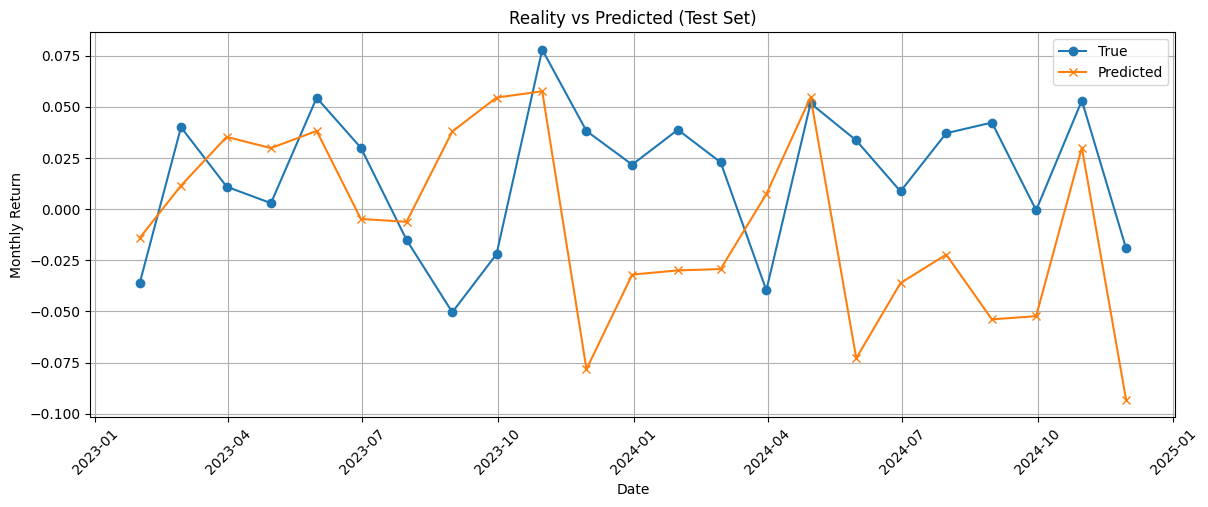

In [74]:
plt.figure(figsize=(14,5))
plt.plot(y_test.index, y_test.values, label="True", marker='o')
plt.plot(y_test.index, y_pred, label="Predicted", marker='x')
plt.title("Reality vs Predicted (Test Set)")
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()